In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
pip install split-folders tqdm

In [ ]:
!unzip /content/drive/MyDrive/SimulatedData.zip -d /content/final_data

In [ ]:
import splitfolders
splitfolders.ratio('/content/final_data/SimulatedData', output="output", seed=1337, ratio=(0.8, 0.1, 0.1)) 

Copying files: 100913 files [00:14, 6728.49 files/s]


In [ ]:
basetrain_dir = '/content/output/train/'
training_dir = pathlib.Path(basetrain_dir)
baseval_dir = '/content/output/val/'
validation_dir = pathlib.Path(baseval_dir)
basetest_dir = '/content/output/test/'
test_dir = pathlib.Path(basetest_dir)

In [ ]:
batch_size = 32
img_height = 256
img_width = 256

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
data_aug = ImageDataGenerator(rescale=1./255, horizontal_flip=True, width_shift_range = 0.1, height_shift_range = 0.1, 	shear_range=1.2, zoom_range=0.25, rotation_range=360)

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_ds = data_aug.flow_from_directory(
	training_dir,  
	target_size=(img_height, img_width),  
	batch_size = batch_size,
	class_mode='binary')

Found 80730 images belonging to 2 classes.


In [ ]:
validation_ds = test_gen.flow_from_directory(
	validation_dir,
	target_size=(img_height, img_width),
	batch_size = batch_size,
	class_mode='binary')

Found 10090 images belonging to 2 classes.


In [ ]:
confirmation_generator = test_gen.flow_from_directory(
  test_dir,
	target_size = (img_height, img_width),
	batch_size = batch_size,
	class_mode=None,
	shuffle=False)

Found 10093 images belonging to 2 classes.


Model

In [ ]:
sim_model = Sequential()

InceptionResNet_V2 = tf.keras.applications.InceptionResNetV2(include_top = False, 
                     weights = None,
                     input_shape = (256, 256, 3),
                     pooling = 'max',
                     classes = 2)

InceptionResNet_V2.trainable = True
InceptionResNet_V2 = add_regularization(InceptionResNet_V2)

sim_model.add(InceptionResNet_V2)
sim_model.add(Flatten())
sim_model.add(Dense(512, activation = 'relu'))
sim_model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
import os
import tempfile

def add_regularization(model, regularizer=tf.keras.regularizers.l2(0.0001)):

    if not isinstance(regularizer, tf.keras.regularizers.Regularizer):
      print("Regularizer must be a subclass of tf.keras.regularizers.Regularizer")
      return model

    for layer in model.layers:
        for attr in ['kernel_regularizer']:
            if hasattr(layer, attr):
              setattr(layer, attr, regularizer)

    # When we change the layers attributes, the change only happens in the model config file
    model_json = model.to_json()

    # Save the weights before reloading the model.
    tmp_weights_path = os.path.join(tempfile.gettempdir(), 'tmp_weights.h5')
    model.save_weights(tmp_weights_path)

    # load the model from the config
    model = tf.keras.models.model_from_json(model_json)
    
    # Reload the model weights
    model.load_weights(tmp_weights_path, by_name=True)
    return model

In [ ]:
sim_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 module_wrapper (ModuleWrapp  (None, 1536)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              786944    
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 1)                513       
 pper)                                                           
                                                                 
Total params: 55,124,193
Trainable params: 55,063,649


In [ ]:
sim_model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs = 11
history = sim_model.fit(
    train_ds,
    validation_data = validation_ds,
    epochs = epochs
)

Epoch 1/11
2523/2523 [==============================] - 1530s 594ms/step - loss: 3.5529 - accuracy: 0.9955 - val_loss: 1.5566 - val_accuracy: 0.9955
Epoch 2/11
2523/2523 [==============================] - 1505s 597ms/step - loss: 0.8180 - accuracy: 0.9987 - val_loss: 0.4056 - val_accuracy: 0.9978
Epoch 3/11
2523/2523 [==============================] - 1496s 593ms/step - loss: 0.2629 - accuracy: 0.9983 - val_loss: 0.1724 - val_accuracy: 0.9967
Epoch 4/11
2523/2523 [==============================] - 1495s 593ms/step - loss: 0.1220 - accuracy: 0.9992 - val_loss: 0.0852 - val_accuracy: 0.9999
Epoch 5/11
2523/2523 [==============================] - 1497s 593ms/step - loss: 0.0816 - accuracy: 0.9988 - val_loss: 0.0700 - val_accuracy: 0.9988
Epoch 6/11
2523/2523 [==============================] - 1501s 595ms/step - loss: 0.0609 - accuracy: 0.9993 - val_loss: 0.0544 - val_accuracy: 0.9991
Epoch 7/11
2523/2523 [==============================] - 1502s 595ms/step - loss: 0.0507 - accuracy: 0.9991

Evaluation

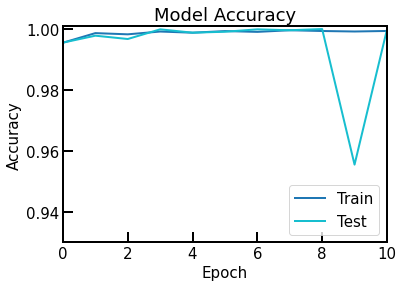

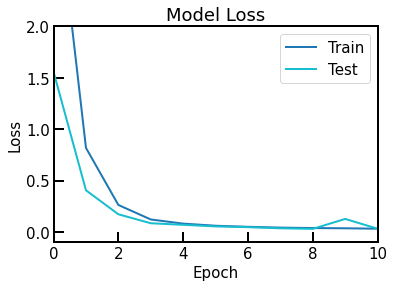

In [ ]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm
import matplotlib.font_manager as fm

#accuracy
plt.rcParams['font.size'] = 15
plt.rcParams['axes.linewidth'] = 2
colors = cm.get_cmap('tab10', 2)
fig = plt.figure(figsize=(4.5, 3))
ax = fig.add_axes([0, 0, 1, 1])
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax.plot(history.history['accuracy'], color = colors(0), linewidth = 2)
ax.plot(history.history['val_accuracy'], color = colors(1), linewidth = 2)
ax.set_ylim(0.93, 1.0009)
ax.set_xlim(0, 10)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

#loss
plt.rcParams['font.size'] = 15
plt.rcParams['axes.linewidth'] = 2
colors = cm.get_cmap('tab10', 2)
fig = plt.figure(figsize=(4.5, 3))
ax = fig.add_axes([0, 0, 1, 1])
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax.plot(history.history['loss'], color = colors(0), linewidth = 2)
ax.plot(history.history['val_loss'], color = colors(1), linewidth = 2)
ax.set_ylim(-0.1, 2)
ax.set_xlim(0, 10)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
def get_predictions(generator,model):
	test_steps_per_epoch = np.math.ceil(generator.samples / generator.batch_size)
	predictions = model.predict_generator(generator, steps=test_steps_per_epoch)
	predictions = [i[0] for i in predictions]
	predictions = np.array(predictions)
	return predictions


def prediction_report(predictions,generator,cutoff,chatter=False):
	predicted_classes = np.copy(predictions)
	predicted_classes[predicted_classes>cutoff] = 1.0
	predicted_classes[predicted_classes<cutoff] = 0.0 
	true_classes = generator.classes
	N_ring = len(np.where(true_classes>0.5)[0])
	N_normal = len(np.where(true_classes<0.5)[0])
	tn, fp, fn, tp = confusion_matrix(true_classes,predicted_classes).ravel()
	matrix = confusion_matrix(true_classes,predicted_classes)
	if chatter:
		print('True Normal predictions: {} | ({} percent)'.format(tn,(tn * 100)/N_normal))
		print('True Ring predictions: {} | ({} percent)'.format(tp,(tp * 100)/N_ring))
		print('False Normal predictions (actually Ring): {} | ({} percent)'.format(fn,(fn * 100)/N_ring))
		print('False Ring predictions (actually Normal): {} | ({} percent)'.format(fp,(fp * 100)/N_normal))
	return(tn, fp, fn, tp)

def MCC(theta):
	tn, fp, fn, tp = theta
	numerator = (tp*tn) - (fp*fn)
	denomenator = np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
	MCC = numerator / denomenator
	return MCC

def AUC(predictions,generator):
	thresholds = np.linspace(0.0,1,20)
	tprs = []
	fprs = []
	for i in thresholds:
		tn, fp, fn, tp = prediction_report(predictions,generator,cutoff=i,chatter=False)
		TPR = tp / (fn+tp)
		FPR = fp / (fp+tn)
		tprs.append(TPR)
		fprs.append(FPR)
	tprs = np.array(tprs)[::-1]
	fprs = np.array(fprs)[::-1]
	plt.plot(fprs,tprs)
	plt.plot([0,1],[0,1],'k')
	area = np.trapz(tprs,x=fprs)
	print("Area under the curve: {}".format(area))
	return area


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


True Normal predictions: 5094 | (100.0 percent)
True Ring predictions: 4993 | (99.87997599519905 percent)
False Normal predictions (actually Ring): 6 | (0.12002400480096019 percent)
False Ring predictions (actually Normal): 0 | (0.0 percent)
MCC:  0.9988116446111701
Area under the curve: 1.0


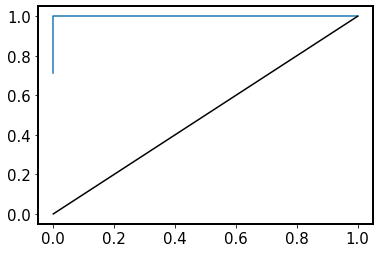

In [ ]:
from sklearn.metrics import confusion_matrix
predictions = get_predictions(confirmation_generator,sim_model)
theta = prediction_report(predictions,confirmation_generator,cutoff=0.5,chatter=True)
mcc = MCC(theta)
print('MCC: ',mcc)
area_under_curve = AUC(predictions,confirmation_generator)
#print(area_under_curve)

In [ ]:
sim_model.save("RingNetSimInception")

INFO:tensorflow:Assets written to: RingNetSimInception/assets


INFO:tensorflow:Assets written to: RingNetSimInception/assets
